# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.io import boreholes_from_files, striplog_from_text,gdf_viewer,\
files_read, striplog_from_df
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
from os import remove
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [4]:
fdir=ROOT_DIR+'/CF_data/synthese/Result_traitem/'
cols=['ID','X','Y','Z','Long','Diam']
crit='Long'

In [5]:
df_all=files_read(fdir, crit, cols)

criteria column not found in file 1 headers : extraction cancelled !
criteria column not found in file 2 headers : extraction cancelled !
-->  boreholes_9.csv (330lines)
-->  boreholes_4.csv (38lines)
criteria column not found in file 5 headers : extraction cancelled !
-->  boreholes_5.csv (155lines)
-->  boreholes_3.csv (97lines)
-->  boreholes_Leve_Z_Pilote.csv (72lines)
criteria column not found in file 9 headers : extraction cancelled !
criteria column not found in file 10 headers : extraction cancelled !
-->  boreholes_2.csv (322lines)
-->  boreholes_1geom.csv (316lines)

 The overall dataframe contains 1330 lines. 7 files used


In [6]:
striplog_from_df(df_all[:5])

{'1': Striplog(1 Intervals, start=0.0, stop=3.0),
 '2': Striplog(1 Intervals, start=0.0, stop=3.0),
 '3': Striplog(1 Intervals, start=0.0, stop=3.0),
 '4': Striplog(1 Intervals, start=0.0, stop=3.0),
 '5': Striplog(1 Intervals, start=0.0, stop=3.0)}

In [7]:
gdf_viewer(df_all)

Rows : 1330, columns : 7


interactive(children=(IntSlider(value=10, description='rows', max=1330, min=10, readout=False), IntSlider(valu…

In [8]:
df_all.query('ID=="1"')

,ID,X,Y,Z,Long,Diam,geometry
0,1,153124.071,122653.382,101.983,8.0,NaN,POINT (153124.071 122653.382)
368,1,153124.071,122653.382,102.622,NaN,NaN,POINT (153124.071 122653.382)


In [9]:
dist_crit=1

a=0
for i in range(0,len(df_all)-1):
    d=df_all.loc[i, 'geometry'].distance(df_all.loc[i+1, 'geometry'])
    if d<dist_crit or d>1e+4:
        a+=1
        #print(f"{df_all.loc[i,'ID']} <-> {df_all.loc[i+1,'ID']} : {d:.2} meters")
print('\n',f'{a}/{len(df_all)} elements with bad XY')


 204/1330 elements with bad XY


In [10]:
import random
# the idea below can be used to build a french lexicon or select color/hatches from a list
test=df_all[:5].copy()
test['Litho']=''
l=['sand', 'clay', 'limestone', 'coal'] #funny random lithology :)
c=['white','red', 'blue', 'black'] 
test['Litho']=test['Litho'].apply(lambda x:random.sample(c,1)[0]+' '+random.sample(l,1)[0])

In [11]:
test=test.append({'ID':'1','X':153124.071,'Y':122653.382,'Z':101.983, 'Long':10, 'Litho':'blue limestone'}, ignore_index=True)
test

,ID,X,Y,Z,Long,Diam,geometry,Litho
0,1,153124.071,122653.382,101.983,8.0,NaN,POINT (153124.071 122653.382),white coal
1,2,153112.310,122638.420,102.088,7.4,NaN,POINT (153112.310 122638.420),red clay
2,3,153140.851,122640.352,101.681,7.7,NaN,POINT (153140.851 122640.352),blue clay
3,4,153117.456,122613.842,101.884,8.0,NaN,POINT (153117.456 122613.842),white limestone
4,5,153139.423,122613.839,101.405,7.5,NaN,POINT (153139.423 122613.839),white clay
5,1,153124.071,122653.382,101.983,10.0,NaN,None,blue limestone


## Create Boreholes from dataframes or files

In [12]:
bhs_dict = {'F1':ROOT_DIR+'/data/test.csv'}#'/data/test.las'}#, 'F2':ROOT_DIR+'/data/test.csv'} # boreholes to insert into the db
bhs_df=[df_all]

In [13]:
boreholes, components= boreholes_from_files(bhs_df, verbose=False)#, x=list(df_all.X), y=list(df_all.Y), verbose=False)


Datraframe 0 processing...

End of the process : 810 unique ID found


In [14]:
boreholes

[<core.orm.BoreholeOrm>(id=1, length=8.0, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=2, length=7.4, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=3, length=7.7, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=4, length=8.0, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=5, length=7.5, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=6, length=7.0, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=7, length=8.2, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=8, length=7.0, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=9, length=1.2, diameter=nan, intervals=1),
 <core.orm.BoreholeOrm>(id=10, length=7.0, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=11, length=6.0, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=12, length=4.6, diameter=nan, intervals=3),
 <core.orm.BoreholeOrm>(id=13, length=8.4, diameter=nan, intervals=2),
 <core.orm.BoreholeOrm>(id=19, length=4.6, diameter=nan, intervals=1),
 <core.orm.Bore

In [15]:
len(boreholes), len(components)

(810, 1)

## Display the striplog and 3D view

In [16]:
bh3d = Borehole3D(name='F_test',length=10)#, legend=legend )

No given legend or incorrect format ! A default legend will be used
No intervals given, pay attention that default interval is actually used !

Borehole geometry created successfully !


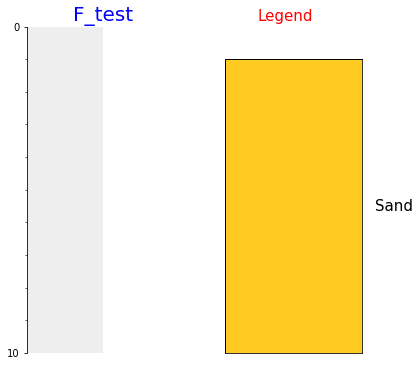

In [17]:
bh3d.log_plot()

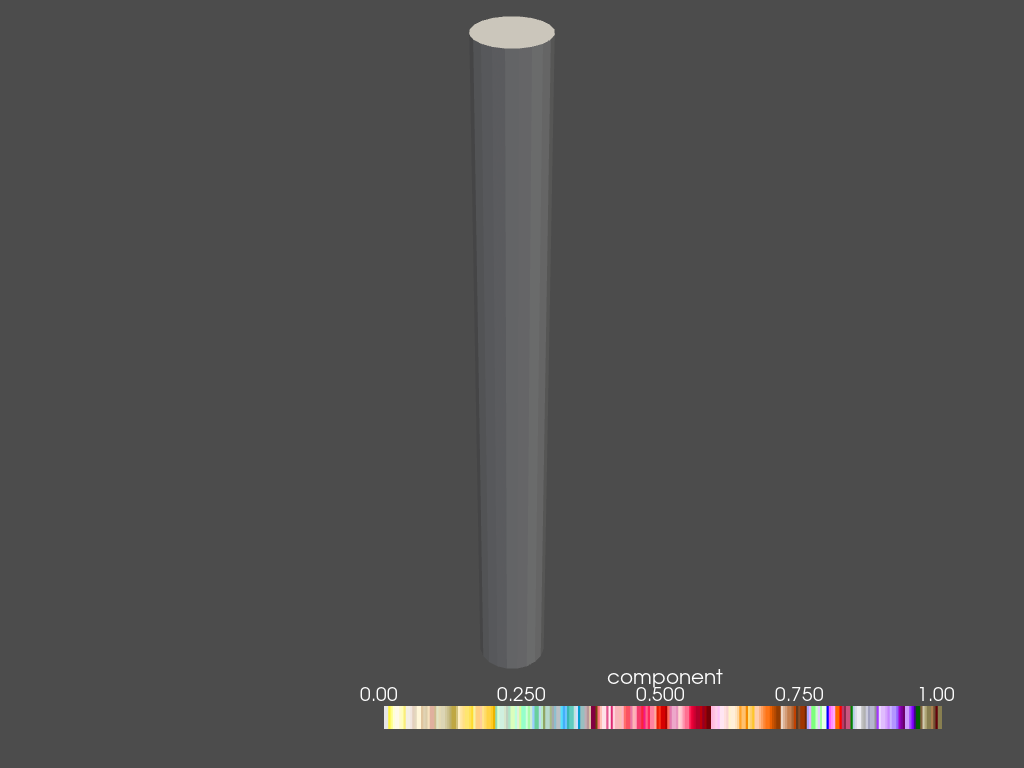

In [18]:
bh3d.plot3d()

### Display project boreholes

In [19]:
remove('tmp_files/tfe_orm_db.db')

In [20]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [21]:
Base.metadata.create_all(engine)

2021-03-11 05:03:16,005 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-03-11 05:03:16,006 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,007 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-03-11 05:03:16,008 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,009 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Boreholes")
2021-03-11 05:03:16,009 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,011 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Boreholes")
2021-03-11 05:03:16,011 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,012 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Positions")
2021-03-11 05:03:16,012 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,013 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Positions")
2021-03-11 05:03:16,014 INFO sqlalchemy.engine.base.Engine ()
2021-03-11

In [22]:
Session = sessionmaker(bind=engine)
session = Session()

In [23]:
p = Project(session)
p.add_components(components)

2021-03-11 05:03:16,065 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:16,067 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:16,067 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,070 INFO sqlalchemy.engine.base.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-03-11 05:03:16,070 INFO sqlalchemy.engine.base.Engine (0, 'Sand, white')
2021-03-11 05:03:16,071 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:16,074 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:16,075 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:16,076 INFO sqlalchemy.engine.base.Engine ()


Add boreholes into the project

In [24]:
for bh in boreholes[:100]:
    p.add_borehole(bh)

2021-03-11 05:03:16,084 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:16,085 INFO sqlalchemy.engine.base.Engine ((0, 0.0, 0.0, 0.0, 153124.071, 122653.382), (1, 3.0, 3.0, 3.0, 153124.071, 122653.382), (2, 0.0, 0.0, 0.0, 153124.071, 122653.382), (3, 3.0, 3.0, 3.0, 153124.071, 122653.382))
2021-03-11 05:03:16,087 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:16,088 INFO sqlalchemy.engine.base.Engine ('1', 8.0, nan)
2021-03-11 05:03:16,090 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:16,092 INFO sqlalchemy.engine.base.Engine ((0, '1', 0, 'white sand', 0, 1), (1, '1', 1, 'white sand', 2, 3))
2021-03-11 05:03:16,094 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:16,123 INFO sqlalchemy.engine.base.Engine BE

2021-03-11 05:03:16,265 INFO sqlalchemy.engine.base.Engine (6,)
2021-03-11 05:03:16,267 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:16,267 INFO sqlalchemy.engine.base.Engine (7,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:16,303 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:16,304 INFO sqlalchemy.engine.base.Engine ((8, 0.0, 0.0, 0.0, 153117.456, 122613.842), (9, 3.0, 3.0, 3.0, 153117.456, 122613.842))
2021-03-11 05:03:16,305 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:16,306 INFO

2021-03-11 05:03:16,440 INFO sqlalchemy.engine.base.Engine (13,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:16,480 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:16,481 INFO sqlalchemy.engine.base.Engine (3.0, '6')
2021-03-11 05:03:16,482 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:16,483 INFO sqlalchemy.engine.base.Engine ('7', 8.2, nan)
2021-03-11 05:03:16,483 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:16,484 INFO sqlalchemy.engine.base.Engine ((14, 0.0, 0.0, 0.0, 153049.921, 122636.217), (15, 3.0, 3.0, 3.0, 153049.921, 122636.217))
2021-03-11 05:03:16,485 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUE

Borehole geometry created successfully !
2021-03-11 05:03:16,667 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:16,668 INFO sqlalchemy.engine.base.Engine (3.0, '9')
2021-03-11 05:03:16,670 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:16,670 INFO sqlalchemy.engine.base.Engine ('10', 7.0, nan)
2021-03-11 05:03:16,672 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:16,673 INFO sqlalchemy.engine.base.Engine ((20, 0.0, 0.0, 0.0, 153109.764, 122663.941), (21, 3.0, 3.0, 3.0, 153109.764, 122663.941), (22, 0.0, 0.0, 0.0, 153109.764, 122663.941), (23, 3.0, 3.0, 3.0, 153109.764, 122663.941))
2021-03-11 05:03:16,674 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:16,6

2021-03-11 05:03:16,805 INFO sqlalchemy.engine.base.Engine ((14, '12', 0, 'white sand', 28, 29), (15, '12', 1, 'white sand', 30, 31), (16, '12', 2, 'white sand', 32, 33))
2021-03-11 05:03:16,806 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:16,811 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:16,813 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:16,813 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,815 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:16,815 INF

2021-03-11 05:03:16,945 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:16,945 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:16,947 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:16,948 INFO sqlalchemy.engine.base.Engine ('19',)
2021-03-11 05:03:16,950 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "P

2021-03-11 05:03:17,075 INFO sqlalchemy.engine.base.Engine (46,)
2021-03-11 05:03:17,076 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:17,077 INFO sqlalchemy.engine.base.Engine (47,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:17,112 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:17,113 INFO sqlalchemy.engine.base.Engine ((48, 0.0, 0.0, 0.0, 152997.314, 122604.861), (49, 3.0, 3.0, 3.0, 152997.314, 122604.861), (50, 0.0, 0.0, 0.0, 152997.314, 122604.861), (51, 3.0, 3.0, 3.0, 152997.314, 122604.861), (52, 0.0, 0.0, 0.0, 152997.314, 122604.861), (53, 

2021-03-11 05:03:17,244 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:17,244 INFO sqlalchemy.engine.base.Engine ((56, 0.0, 0.0, 0.0, 153101.21, 122624.393), (57, 3.0, 3.0, 3.0, 153101.21, 122624.393))
2021-03-11 05:03:17,246 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:17,246 INFO sqlalchemy.engine.base.Engine (28, '29', 0, 'white sand', 56, 57)
2021-03-11 05:03:17,248 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:17,251 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:17,251 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:17,252 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:17,254 INFO sqlalc

2021-03-11 05:03:17,419 INFO sqlalchemy.engine.base.Engine (3.0, '31')
2021-03-11 05:03:17,420 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:17,420 INFO sqlalchemy.engine.base.Engine ('32', 6.9, nan)
2021-03-11 05:03:17,421 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:17,422 INFO sqlalchemy.engine.base.Engine ((31, '32', 0, 'white sand', 62, 63), (32, '32', 1, 'white sand', 64, 65))
2021-03-11 05:03:17,423 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:17,427 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:17,428 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:17,428 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03

2021-03-11 05:03:17,626 INFO sqlalchemy.engine.base.Engine (69,)
2021-03-11 05:03:17,628 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:17,629 INFO sqlalchemy.engine.base.Engine (70,)
2021-03-11 05:03:17,630 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:17,630 INFO sqlalchemy.engine.base.Engine (71,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:17,667 INFO sqlalchem

2021-03-11 05:03:17,806 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:17,806 INFO sqlalchemy.engine.base.Engine (76,)
2021-03-11 05:03:17,807 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:17,808 INFO sqlalchemy.engine.base.Engine (77,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:17,842 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, 

2021-03-11 05:03:17,979 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:17,979 INFO sqlalchemy.engine.base.Engine (82,)
2021-03-11 05:03:17,981 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:17,981 INFO sqlalchemy.engine.base.Engine (83,)
2021-03-11 05:03:17,984 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Position

2021-03-11 05:03:18,169 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:18,170 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:18,171 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:18,173 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:18,174 INFO sqlalchemy.engine.base.Engine ('44',)
2021-03-11 05:03:18,175 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".low

2021-03-11 05:03:18,344 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:18,345 INFO sqlalchemy.engine.base.Engine (3.0, '49')
2021-03-11 05:03:18,346 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:18,346 INFO sqlalchemy.engine.base.Engine ('52', 6.6, nan)
2021-03-11 05:03:18,348 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:18,348 INFO sqlalchemy.engine.base.Engine (49, '52', 0, 'white sand', 98, 99)
2021-03-11 05:03:18,350 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:18,353 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:18,355 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2

2021-03-11 05:03:18,484 INFO sqlalchemy.engine.base.Engine (104,)
2021-03-11 05:03:18,486 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:18,486 INFO sqlalchemy.engine.base.Engine (105,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:18,526 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:18,527 INFO sqlalchemy.engine.base.Engine ((106, 0.0, 0.0, 0.0, 152989.029, 122692.099), (107, 3.0, 3.0, 3.0, 152989.029, 122692.099), (108, 0.0, 0.0, 0.0, 152989.029, 122692.099), (109, 3.0, 3.0, 3.0, 152989.029, 122692.099))
2021-03-11 05:03:18,528 INFO sqlalchemy.engi

2021-03-11 05:03:18,665 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:18,668 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:18,669 INFO sqlalchemy.engine.base.Engine ('61',)
2021-03-11 05:03:18,670 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:18,671 INFO sqlalchemy.engine.base.Engine (112,)
2021-03-11 05:03:18,672 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS

2021-03-11 05:03:18,840 INFO sqlalchemy.engine.base.Engine (3.0, '64')
2021-03-11 05:03:18,841 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:18,842 INFO sqlalchemy.engine.base.Engine ('65', 9.3, nan)
2021-03-11 05:03:18,843 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:18,844 INFO sqlalchemy.engine.base.Engine ((60, '65', 0, 'white sand', 120, 121), (61, '65', 1, 'white sand', 122, 123))
2021-03-11 05:03:18,846 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:18,849 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:18,850 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:18,850 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 0

2021-03-11 05:03:18,978 INFO sqlalchemy.engine.base.Engine ('68',)
2021-03-11 05:03:18,979 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:18,979 INFO sqlalchemy.engine.base.Engine (128,)
2021-03-11 05:03:18,980 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:18,980 INFO sqlalchemy.engine.base.Engine (129,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:19,015 INFO sqlal

2021-03-11 05:03:19,129 INFO sqlalchemy.engine.base.Engine ((68, '75', 0, 'white sand', 136, 137), (69, '75', 1, 'white sand', 138, 139), (70, '75', 2, 'white sand', 140, 141))
2021-03-11 05:03:19,130 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:19,133 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:19,134 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:19,134 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:19,136 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:19,1

2021-03-11 05:03:19,246 INFO sqlalchemy.engine.base.Engine (3.0, '77')
2021-03-11 05:03:19,247 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:19,248 INFO sqlalchemy.engine.base.Engine ('79', 6.6, nan)
2021-03-11 05:03:19,250 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:19,251 INFO sqlalchemy.engine.base.Engine ((148, 0.0, 0.0, 0.0, 152893.382, 122592.775), (149, 3.0, 3.0, 3.0, 152893.382, 122592.775), (150, 0.0, 0.0, 0.0, 152893.382, 122592.775), (151, 3.0, 3.0, 3.0, 152893.382, 122592.775), (152, 0.0, 0.0, 0.0, 152893.382, 122592.775), (153, 3.0, 3.0, 3.0, 152893.382, 122592.775))
2021-03-11 05:03:19,252 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:19,253 INFO sqlalchemy.engine.base.Engine ((74, '79', 0, 'white 

2021-03-11 05:03:19,378 INFO sqlalchemy.engine.base.Engine ((158, 0.0, 0.0, 0.0, 152809.121, 122661.331), (159, 3.0, 3.0, 3.0, 152809.121, 122661.331), (160, 0.0, 0.0, 0.0, 152809.121, 122661.331), (161, 3.0, 3.0, 3.0, 152809.121, 122661.331))
2021-03-11 05:03:19,380 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:19,381 INFO sqlalchemy.engine.base.Engine (3.0, '80')
2021-03-11 05:03:19,381 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:19,382 INFO sqlalchemy.engine.base.Engine ('81', 6.4, nan)
2021-03-11 05:03:19,383 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:19,384 INFO sqlalchemy.engine.base.Engine ((79, '81', 0, 'white sand', 158, 159), (80, '81', 1, 'white sand', 160, 161))
2021-03-11 05:03:19,385 INFO sqlalchemy.engine.base.Engine CO

2021-03-11 05:03:19,518 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:19,518 INFO sqlalchemy.engine.base.Engine (3.0, '82')
2021-03-11 05:03:19,519 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:19,520 INFO sqlalchemy.engine.base.Engine ('83', 4.7, nan)
2021-03-11 05:03:19,522 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:19,522 INFO sqlalchemy.engine.base.Engine ((84, '83', 0, 'white sand', 168, 169), (85, '83', 1, 'white sand', 170, 171), (86, '83', 2, 'white sand', 172, 173))
2021-03-11 05:03:19,523 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:19,528 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:19,529 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "B

2021-03-11 05:03:19,669 INFO sqlalchemy.engine.base.Engine ('85',)
2021-03-11 05:03:19,671 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:19,671 INFO sqlalchemy.engine.base.Engine (176,)
2021-03-11 05:03:19,672 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:19,673 INFO sqlalchemy.engine.base.Engine (177,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:19,712 INFO sqlal

2021-03-11 05:03:19,840 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:19,843 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:19,844 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:19,845 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:19,848 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:19,848 INFO sqlalchemy.engine.base.Engine ('89',)
2021-03-11 05:03:19,850 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions

2021-03-11 05:03:20,029 INFO sqlalchemy.engine.base.Engine ((192, 0.0, 0.0, 0.0, 152720.678, 122653.516), (193, 3.0, 3.0, 3.0, 152720.678, 122653.516))
2021-03-11 05:03:20,032 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:20,033 INFO sqlalchemy.engine.base.Engine (3.0, '91')
2021-03-11 05:03:20,035 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:20,035 INFO sqlalchemy.engine.base.Engine ('92', 4.35, nan)
2021-03-11 05:03:20,036 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:20,037 INFO sqlalchemy.engine.base.Engine (96, '92', 0, 'white sand', 192, 193)
2021-03-11 05:03:20,038 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:20,042 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:20,043 INFO sqlalchemy.engine.base

2021-03-11 05:03:20,169 INFO sqlalchemy.engine.base.Engine (198,)
2021-03-11 05:03:20,171 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,171 INFO sqlalchemy.engine.base.Engine (199,)
2021-03-11 05:03:20,175 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,175 INFO sqlalchemy.engine.base.Engine (200,)
2021-03-11 05:03:20,177 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Pos

2021-03-11 05:03:20,320 INFO sqlalchemy.engine.base.Engine (208,)
2021-03-11 05:03:20,322 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,323 INFO sqlalchemy.engine.base.Engine (209,)
2021-03-11 05:03:20,326 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,327 INFO sqlalchemy.engine.base.Engine (210,)
2021-03-11 05:03:20,329 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Pos

2021-03-11 05:03:20,467 INFO sqlalchemy.engine.base.Engine (218,)
2021-03-11 05:03:20,468 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,469 INFO sqlalchemy.engine.base.Engine (219,)
2021-03-11 05:03:20,472 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,473 INFO sqlalchemy.engine.base.Engine (220,)
2021-03-11 05:03:20,475 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Pos

2021-03-11 05:03:20,629 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:20,632 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:20,633 INFO sqlalchemy.engine.base.Engine ('102',)
2021-03-11 05:03:20,634 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,635 INFO sqlalchemy.engine.base.Engine (230,)
2021-03-11 05:03:20,636 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id A

2021-03-11 05:03:20,729 INFO sqlalchemy.engine.base.Engine (243,)
2021-03-11 05:03:20,733 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,733 INFO sqlalchemy.engine.base.Engine (244,)
2021-03-11 05:03:20,735 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,735 INFO sqlalchemy.engine.base.Engine (245,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:20,773 INFO sqlalc

2021-03-11 05:03:20,866 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:20,866 INFO sqlalchemy.engine.base.Engine ('105',)
2021-03-11 05:03:20,868 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:20,869 INFO sqlalchemy.engine.base.Engine (254,)
2021-03-11 05:03:20,870 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Pos

Borehole geometry created successfully !
2021-03-11 05:03:20,993 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:20,994 INFO sqlalchemy.engine.base.Engine ((268, 0.0, 0.0, 0.0, 152820.852, 122624.897), (269, 3.0, 3.0, 3.0, 152820.852, 122624.897), (270, 0.0, 0.0, 0.0, 152820.852, 122624.897), (271, 3.0, 3.0, 3.0, 152820.852, 122624.897), (272, 0.0, 0.0, 0.0, 152820.852, 122624.897), (273, 3.0, 3.0, 3.0, 152820.852, 122624.897))
2021-03-11 05:03:20,995 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:20,996 INFO sqlalchemy.engine.base.Engine (3.0, '106')
2021-03-11 05:03:20,997 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:20,997 INFO sqlalchemy.engine.base.Engine ('107', 6.7, nan)
2021-03-11 05:03:20,998 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, boreh

2021-03-11 05:03:21,090 INFO sqlalchemy.engine.base.Engine (277,)
2021-03-11 05:03:21,092 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,092 INFO sqlalchemy.engine.base.Engine (278,)
2021-03-11 05:03:21,093 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,094 INFO sqlalchemy.engine.base.Engine (279,)
2021-03-11 05:03:21,096 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Pos

2021-03-11 05:03:21,208 INFO sqlalchemy.engine.base.Engine ('110',)
2021-03-11 05:03:21,209 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,210 INFO sqlalchemy.engine.base.Engine (288,)
2021-03-11 05:03:21,211 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,212 INFO sqlalchemy.engine.base.Engine (289,)
2021-03-11 05:03:21,214 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "P

2021-03-11 05:03:21,332 INFO sqlalchemy.engine.base.Engine ('112',)
2021-03-11 05:03:21,334 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,335 INFO sqlalchemy.engine.base.Engine (298,)
2021-03-11 05:03:21,337 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,337 INFO sqlalchemy.engine.base.Engine (299,)
2021-03-11 05:03:21,340 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "P

2021-03-11 05:03:21,468 INFO sqlalchemy.engine.base.Engine (308,)
2021-03-11 05:03:21,469 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,470 INFO sqlalchemy.engine.base.Engine (309,)
2021-03-11 05:03:21,472 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:21,474 INFO sqlalchemy.engine.base.Engine (310,)
2021-03-11 05:03:21,475 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Pos

2021-03-11 05:03:21,608 INFO sqlalchemy.engine.base.Engine (319,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:21,649 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:21,650 INFO sqlalchemy.engine.base.Engine ((320, 0.0, 0.0, 0.0, 152666.038, 122751.128), (321, 3.0, 3.0, 3.0, 152666.038, 122751.128), (322, 0.0, 0.0, 0.0, 152666.038, 122751.128), (323, 3.0, 3.0, 3.0, 152666.038, 122751.128))
2021-03-11 05:03:21,651 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:21,652 INFO sqlalchemy.engine.base.Engine (3.0, '119')
2021-03-11 05:03:21,653 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:21,653 INFO sqlalchemy.engine.base.Engine ('124', 4.6, nan)
2021-03-11 05:03:21,654 INFO sqlalchemy.engine.base

2021-03-11 05:03:21,743 INFO sqlalchemy.engine.base.Engine (329,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:21,777 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:21,778 INFO sqlalchemy.engine.base.Engine (3.0, '125')
2021-03-11 05:03:21,779 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:21,780 INFO sqlalchemy.engine.base.Engine ('126', 4.6, nan)
2021-03-11 05:03:21,781 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:21,782 INFO sqlalchemy.engine.base.Engine ((330, 0.0, 0.0, 0.0, 152661.438, 122704.306), (331, 3.0, 3.0, 3.0, 152661.438, 122704.306), (332, 0.0, 0.0, 0.0, 152661.438, 122704.306), (333, 3.0, 3.0, 3.0, 152661.438, 122704.306))
2021-03-11 05:03:21,783 INFO sqlalchemy.engine.base

2021-03-11 05:03:21,911 INFO sqlalchemy.engine.base.Engine ('129', 9.0, nan)
2021-03-11 05:03:21,912 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:21,913 INFO sqlalchemy.engine.base.Engine ((169, '129', 0, 'white sand', 338, 339), (170, '129', 1, 'white sand', 340, 341), (171, '129', 2, 'white sand', 342, 343))
2021-03-11 05:03:21,914 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:21,919 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:21,920 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:21,920 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 05:03:21,923 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".in

2021-03-11 05:03:22,061 INFO sqlalchemy.engine.base.Engine ('133',)
2021-03-11 05:03:22,063 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:22,063 INFO sqlalchemy.engine.base.Engine (346,)
2021-03-11 05:03:22,065 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:22,065 INFO sqlalchemy.engine.base.Engine (347,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !
2021-03-11 05:03:22,103 INFO sqla

2021-03-11 05:03:22,239 INFO sqlalchemy.engine.base.Engine ('142',)
2021-03-11 05:03:22,241 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:22,242 INFO sqlalchemy.engine.base.Engine (352,)
2021-03-11 05:03:22,244 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:22,245 INFO sqlalchemy.engine.base.Engine (353,)
2021-03-11 05:03:22,248 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "P

2021-03-11 05:03:22,412 INFO sqlalchemy.engine.base.Engine (3.0, '152')
2021-03-11 05:03:22,413 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-03-11 05:03:22,414 INFO sqlalchemy.engine.base.Engine ('154', 4.6, nan)
2021-03-11 05:03:22,415 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:22,415 INFO sqlalchemy.engine.base.Engine ((362, 0.0, 0.0, 0.0, 152495.146, 122819.183), (363, 3.0, 3.0, 3.0, 152495.146, 122819.183))
2021-03-11 05:03:22,417 INFO sqlalchemy.engine.base.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 05:03:22,417 INFO sqlalchemy.engine.base.Engine (181, '154', 0, 'white sand', 362, 363)
2021-03-11 05:03:22,418 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 05:03:22,422 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:22,42

2021-03-11 05:03:22,549 INFO sqlalchemy.engine.base.Engine (368,)
2021-03-11 05:03:22,550 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 05:03:22,550 INFO sqlalchemy.engine.base.Engine (369,)
No given legend or incorrect format ! A default legend will be used
Borehole geometry created successfully !


In [25]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-03-11 05:03:22,590 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 05:03:22,592 INFO sqlalchemy.engine.base.Engine (3.0, '162')
2021-03-11 05:03:22,593 INFO sqlalchemy.engine.base.Engine COMMIT
Boreholes in the project :  100


In [26]:
p.boreholes

2021-03-11 05:03:22,602 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 05:03:22,604 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,605 INFO sqlalchemy.engine.base.Engine ('1',)
2021-03-11 05:03:22,607 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,609 INFO sqlalchemy.engine.base.Engine ('1',)
2021-03-11 05:03:22,611 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "B

2021-03-11 05:03:22,659 INFO sqlalchemy.engine.base.Engine ('11',)
2021-03-11 05:03:22,660 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,661 INFO sqlalchemy.engine.base.Engine ('12',)
2021-03-11 05:03:22,662 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,663 INFO sqlalchemy.engine.base.Engine ('12',)
2021-03-11 05:03:22,665 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Borehole

2021-03-11 05:03:22,713 INFO sqlalchemy.engine.base.Engine ('32',)
2021-03-11 05:03:22,715 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,715 INFO sqlalchemy.engine.base.Engine ('33',)
2021-03-11 05:03:22,717 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,717 INFO sqlalchemy.engine.base.Engine ('33',)
2021-03-11 05:03:22,718 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Borehole

2021-03-11 05:03:22,765 INFO sqlalchemy.engine.base.Engine ('44',)
2021-03-11 05:03:22,767 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,767 INFO sqlalchemy.engine.base.Engine ('47',)
2021-03-11 05:03:22,769 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,770 INFO sqlalchemy.engine.base.Engine ('47',)
2021-03-11 05:03:22,772 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Borehole

2021-03-11 05:03:22,816 INFO sqlalchemy.engine.base.Engine ('65',)
2021-03-11 05:03:22,818 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,818 INFO sqlalchemy.engine.base.Engine ('67',)
2021-03-11 05:03:22,820 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,821 INFO sqlalchemy.engine.base.Engine ('67',)
2021-03-11 05:03:22,823 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Borehole

2021-03-11 05:03:22,867 INFO sqlalchemy.engine.base.Engine ('83',)
2021-03-11 05:03:22,870 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,870 INFO sqlalchemy.engine.base.Engine ('84',)
2021-03-11 05:03:22,871 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,872 INFO sqlalchemy.engine.base.Engine ('84',)
2021-03-11 05:03:22,874 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Borehole

2021-03-11 05:03:22,921 INFO sqlalchemy.engine.base.Engine ('96',)
2021-03-11 05:03:22,922 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,923 INFO sqlalchemy.engine.base.Engine ('98',)
2021-03-11 05:03:22,924 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,925 INFO sqlalchemy.engine.base.Engine ('98',)
2021-03-11 05:03:22,926 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Borehole

2021-03-11 05:03:22,973 INFO sqlalchemy.engine.base.Engine ('108',)
2021-03-11 05:03:22,975 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:22,976 INFO sqlalchemy.engine.base.Engine ('109',)
2021-03-11 05:03:22,977 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:22,978 INFO sqlalchemy.engine.base.Engine ('109',)
2021-03-11 05:03:22,980 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-03-11 05:03:23,021 INFO sqlalchemy.engine.base.Engine ('126',)
2021-03-11 05:03:23,023 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:23,024 INFO sqlalchemy.engine.base.Engine ('127',)
2021-03-11 05:03:23,025 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:23,025 INFO sqlalchemy.engine.base.Engine ('127',)
2021-03-11 05:03:23,028 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreh

2021-03-11 05:03:23,071 INFO sqlalchemy.engine.base.Engine ('161',)
2021-03-11 05:03:23,073 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 05:03:23,073 INFO sqlalchemy.engine.base.Engine ('162',)
2021-03-11 05:03:23,075 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 05:03:23,076 INFO sqlalchemy.engine.base.Engine ('162',)


[<core.orm.BoreholeOrm>(id=1, length=3.0, diameter=None, intervals=2),
 <core.orm.BoreholeOrm>(id=2, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=3, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=4, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=5, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=6, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=7, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=8, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=9, length=3.0, diameter=None, intervals=1),
 <core.orm.BoreholeOrm>(id=10, length=3.0, diameter=None, intervals=2),
 <core.orm.BoreholeOrm>(id=11, length=3.0, diameter=None, intervals=2),
 <core.orm.BoreholeOrm>(id=12, length=3.0, diameter=None, intervals=3),
 <core.orm.BoreholeOrm>(id=13, length=3.0, diameter=None, intervals=2),
 <core.orm.BoreholeOrm>(id=19, length=3.0, diameter=None, intervals=1),
 

In [27]:
p.refresh(verbose=True)

2021-03-11 05:03:23,083 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 05:03:23,084 INFO sqlalchemy.engine.base.Engine ()


In [28]:
session.close()

2021-03-11 05:03:23,089 INFO sqlalchemy.engine.base.Engine ROLLBACK


In [29]:
p.boreholes_3d[0]

Striplog(2 Intervals, start=0.0, stop=3.0)

### The Borehole in 3D using X3D for interaction within the notebook

In [30]:
p.plot3d(x3d=True)

##  ==================Zone Brouillon==================

#### Codes qui peuvent aider si besoin (Brouillon)